In [2]:
!wget https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/filtered.npy

--2020-07-31 20:25:27--  https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/filtered.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374224480 (1.3G) [application/octet-stream]
Saving to: ‘filtered.npy’

filtered.npy        100%[===================>]   1.28G  48.1MB/s    in 30s     

2020-07-31 20:25:58 (43.1 MB/s) - ‘filtered.npy’ saved [1374224480/1374224480]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
import math
import cv2
import pandas as pd

Here is the code I used to clean the image before finding SNR

In [ ]:
images = np.load('/content/filtered.npy')

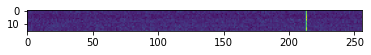

In [ ]:
# show and save original image
plt.imshow(images[0], cmap='viridis')
plt.imsave('image_ori.png', arr=images[0], format='PNG', cmap='viridis')

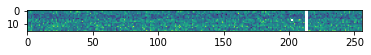

In [ ]:
# show sigma clipped image
clipped_im = sigma_clip(images[0], sigma=4)
plt.imshow(clipped_im, cmap='viridis')
#plt.imsave('clipped_im.png', arr=clipped_im, format='PNG', cmap='viridis')

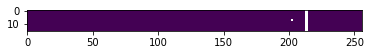

In [ ]:
# get just the signal by subtracting the sigma clipped image from the original image
sub = images[0] - clipped_im
plt.imshow(sub, cmap='viridis')
plt.imsave('signal.png', arr=sub, format='PNG', cmap='viridis')

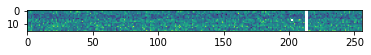

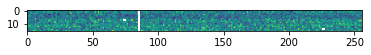

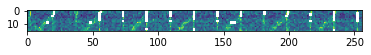

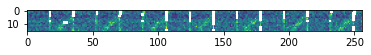

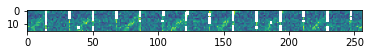

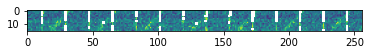

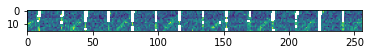

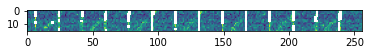

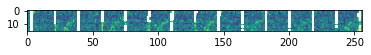

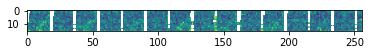

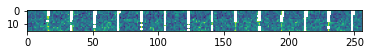

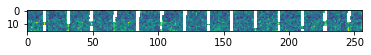

In [ ]:
#sigma clipping testing
for i in range(12):
  sc = sigma_clip(images[i], sigma=4)
  plt.imshow(sc, cmap='viridis')
  plt.show()

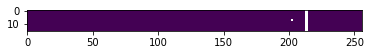

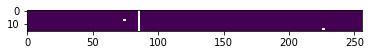

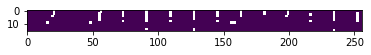

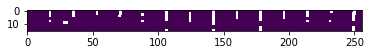

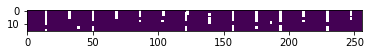

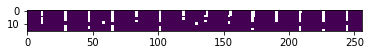

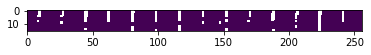

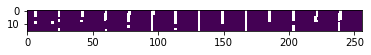

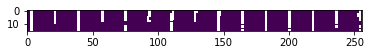

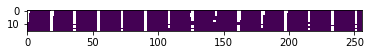

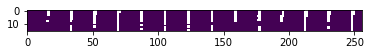

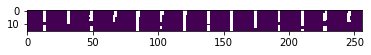

In [ ]:
#Getting noiseless signal?
for i in range(12):
  sc = sigma_clip(images[i], sigma=4)
  clean = images[i] - sc
  plt.imshow(clean, cmap='viridis')
  plt.show()

One way to get PSNR, compare original image with the signal image

In [ ]:
original = cv2.imread("image_ori.png")
contrast = cv2.imread("signal.png",1)
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    else:
      PIXEL_MAX = 255.0
      return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(original, contrast)
print(d)

29.124421317494434


In [ ]:
hold = np.array([])
for i in range(images.shape[0]):
  plt.imsave('original.png', format='PNG', arr=images[i], cmap='viridis')
  signal = images[i] - sigma_clip(images[i], sigma=4)
  plt.imsave('signal_con.png', format='PNG', arr=signal, cmap='viridis')
  hold = np.append(hold, psnr(cv2.imread('original.png'), cv2.imread('signal_con.png',1)))
hold

array([29.12442132, 29.08467115, 28.55024641, ..., 28.52899779,
       29.02312784, 29.04439163])

In [ ]:
np.mean(hold)

29.096561179773627

This code below was analyzed on blpc0 datax/scratch/swang/SNR
and shows the relationship between the average SNR and the test window size. I used the method above to calculate SNR of each image.

In [3]:
d = {'window_size': [2,4,8,16,32,64,128,256,512], 'PSNR': [29.26409, 28.8436, 28.6037, 28.4651, 28.3992, 28.34298, 28.2811, 28.1886, 28.16799]}
df = pd.DataFrame(data=d)
df

,window_size,PSNR
0,2,29.26409
1,4,28.84360
2,8,28.60370
3,16,28.46510
4,32,28.39920
5,64,28.34298
6,128,28.28110
7,256,28.18860
8,512,28.16799


Text(0, 0.5, 'Mean SNR')

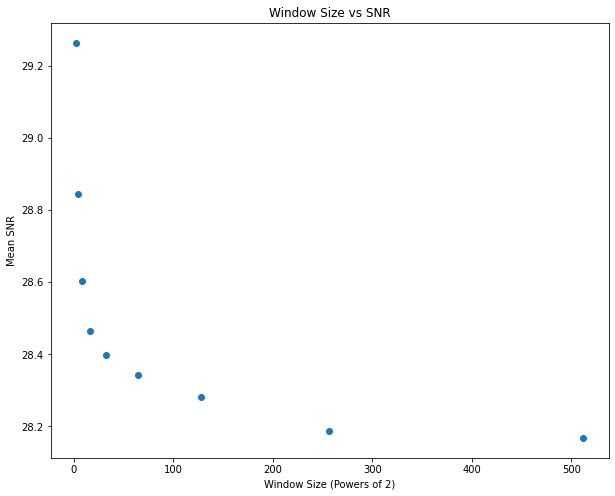

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x=df["window_size"], y=df["PSNR"])
plt.title("Window Size vs SNR")
plt.xlabel("Window Size (Powers of 2)")
plt.ylabel("Mean SNR")

Signal to noise ratio formula below I found online (unsure how reliable this is, so I did not use this method, leaving it here in case there's a use)

In [ ]:
def snr(img_array):
  ima = np.max(img_array)
  imi = np.min(img_array)
  ims = np.std(img_array)
  return np.log((ima-imi)/ims)*10

In [ ]:
snr(images[3])

26.380731311162016

In [ ]:
hold = np.array([])
for i in range(images.shape[0]):
  hold = np.append(hold, snr(images[i]))
hold

array([28.31601598, 28.36239739, 23.24738192, 26.38073131, 25.67482325,
       24.67135448, 23.81636394, 24.50067322, 24.59916053, 24.68335289,
       24.69418706, 24.31313529, 24.39990766, 24.58860662, 25.57812237,
       25.34212546, 24.26370395, 24.50278375, 24.90032999, 25.01462528,
       25.36565966, 23.43618646, 23.76567606, 24.29298382, 23.50985396,
       24.82702228, 23.82546514, 25.40277218, 25.36947111, 24.83977693,
       23.86526691, 25.12805068, 23.97996081, 24.20415283, 24.43087681,
       24.67348036, 23.86787034, 23.86586366, 24.74055162, 25.21350015,
       24.49734645, 24.28191728, 24.066775  , 24.29820199, 24.24709731,
       25.09884953, 24.30436186, 24.80832303, 24.44282202, 23.85199556,
       24.31084122, 24.30011679, 24.4316716 , 24.86974206, 26.29733892,
       25.7385732 , 23.73728049, 22.76314551, 23.77339449, 24.23791031,
       24.23273672, 24.41628767, 22.8098258 , 23.99016859, 24.28973514,
       23.74518133, 23.92109475, 23.63897062, 23.55513261, 25.01

In [ ]:
np.mean(hold)

24.38113392593102